In [1]:
import pandas as pd
import yfinance as yf

# Get list of S&P 500 ticker symbols
# get current tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# edit brk.b to brkb
sp500_tickers[sp500_tickers.index('BRK.B')] = 'BRK-B'
sp500_tickers[sp500_tickers.index('BF.B')] = 'BF-B'

# Download stock data for each symbol
sp500_data = yf.download(sp500_tickers, start = '2023-03-21',end = '2023-03-29', interval='1d', group_by='ticker')

/Users/vedanshi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


[*********************100%***********************]  503 of 503 completed


In [5]:
sp500_data

AZO                                         \
                                  Open         High          Low        Close   
Date                                                                            
2023-03-21 00:00:00-04:00  2406.290039  2409.489990  2383.219971  2394.949951   
2023-03-22 00:00:00-04:00  2397.659912  2397.659912  2347.780029  2349.300049   
2023-03-23 00:00:00-04:00  2349.709961  2356.840088  2307.139893  2307.820068   
2023-03-24 00:00:00-04:00  2316.310059  2338.520020  2294.750000  2329.399902   
2023-03-27 00:00:00-04:00  2336.489990  2386.550049  2333.149902  2368.550049   
2023-03-28 00:00:00-04:00  2370.919922  2411.489990  2370.919922  2405.219971   

                                                     TRMB             \
                             Adj Close  Volume       Open       High   
Date                                                                   
2023-03-21 00:00:00-04:00  2394.949951   93600  49.389999  50.029999   
2023-03-22 00:00:00-04:00  2349.300049  109700  49.779999  50.299999   
2023-03-23 00:00:00-04:00  2307.820068  155500  48.820000  49.730000   
2023-03-24 00:00:00-04:00  2329.399902  148500  48.500000  49.540001   
2023-03-27 00:00:00-04:00  2368.550049  220000  49.779999  50.209999   
2023-03-28 00:00:00-04:00  2405.219971  139900  49.669998  49.950001   

                                                 ...          CB              \
                                 Low      Close  ...         Low       Close   
Date                                             ...                           
2023-03-21 00:00:00-04:00  49.070000  49.900002  ...  191.800003  194.289993   
2023-03-22 00:00:00-04:00  48.509998  48.529999  ...  190.000000  190.039993   
2023-03-23 00:00:00-04:00  48.349998  48.689999  ...  184.970001  186.009995   
2023-03-24 00:00:00-04:00  48.160000  49.439999  ...  183.399994  186.550003   
2023-03-27 00:00:00-04:00  49.230000  49.720001  ...  187.419998  188.919998   
2023-03-28 00:00:00-04:00  49.320000  49.900002  ...  187.520004  189.559998   

                                                       WY             \
                            Adj Close   Volume       Open       High   
Date                                                                   
2023-03-21 00:00:00-04:00  194.289993  2260200  30.100000  30.180000   
2023-03-22 00:00:00-04:00  190.039993  1406700  29.650000  29.799999   
2023-03-23 00:00:00-04:00  186.009995  1763100  28.920000  29.110001   
2023-03-24 00:00:00-04:00  186.550003  1855100  28.010000  28.540001   
2023-03-27 00:00:00-04:00  188.919998  1975500  28.750000  28.860001   
2023-03-28 00:00:00-04:00  189.559998  1316800  28.540001  28.709999   

                                                                     
                                 Low      Close  Adj Close   Volume  
Date                                                                 
2023-03-21 00:00:00-04:00  29.370001  29.840000  29.840000  3997800  
2023-03-22 00:00:00-04:00  28.799999  28.809999  28.809999  3818500  
2023-03-23 00:00:00-04:00  28.070000  28.299999  28.299999  3861500  
2023-03-24 00:00:00-04:00  27.650000  28.540001  28.540001  3625400  
2023-03-27 00:00:00-04:00  28.420000  28.700001  28.700001  3347600  
2023-03-28 00:00:00-04:00  28.350000  28.420000  28.420000  2817700  

[6 rows x 3018 columns]

## Articles

In [2]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vedanshi/nltk_data...


In [4]:
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
tickers = sp500_tickers
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [ ]:
# Loop through each ticker to extract news
for ticker in tickers:
    # Get the news table for the ticker
    news_table = news_tables[ticker]
    
    # Get all the table rows tagged in HTML with <tr> into ‘tr_list’
    tr_list = news_table.findAll('tr')
    
    # Loop through each row and extract the link and text
    for i, row in enumerate(tr_list):
        # Read the text of the element ‘a’ into ‘link_text’
        link_text = row.a.text
        
        # Read the text of the element ‘td’ into ‘data_text’
        data_text = row.td.text
                
        # Exit after printing 4 rows of data
        if i == 3:
            break
        
    parsed_news = []
    # Iterate through the news
    for file_name, news_table in news_tables.items():
        # Iterate through all tr tags in 'news_table'
        for x in news_table.findAll('tr'):
            # read the text from each tr tag into text
            # get text from a only
            text = x.get_text() 
            # splite text in the td tag into a list 
            date_scrape = x.td.text.split()
            # if the length of 'date_scrape' is 1, load 'time' as the only element
            if len(date_scrape) == 1:
                time = date_scrape[0]
                
            # else load 'date' as the 1st element and 'time' as the second    
            else:
                date = date_scrape[0]
                time = date_scrape[1]
                # Extract the ticker from the file name, get the string up to the 1st '_'  
                ticker = file_name.split('_')[0]
            
                # Append ticker, date, time and headline as a list to the 'parsed_news' list
                parsed_news.append([ticker, date, time, text])
        

In [5]:
# TODO: RUN THIS
# Print the Close prices for the past 5 days for each stock
# print(sp500_data['Close'])
# get the tickers for the stocks
tickers = sp500_data.columns.levels[0].tolist()

In [ ]:
import tweepy

# Set up Twitter API credentials

client_id = 'I08hCSFouHGUecnnY76OpEmnj'
client_secret = '98DJra8BJNtLSYs8Yrde52whzDmJehB6AOudyG3SwglYg3G4EG'
access_token = '1571539935408144392-4n20KegMQq8z60pu3qLITUTLPRfn7W'
access_token_secret = 'DfAaro8MU4aURJR26DtcisvRRzHsdBqWaADKZS8sTDlVc'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAGmQlAEAAAAA6tpzWYzMe%2BsbjpZOz8ttoWNh25o%3DxIwBbeRzEBFhuUys97ie5YDmqk35IZ7GMY46pez3rqds2iFp41'

auth = tweepy.OAuthHandler(client_id, client_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
# split tickers into 4 groups
tickers_luke = tickers[0:125]
tickers_roma = tickers[125:250]
tickers_daniel = tickers[250:375]
tickers_vedanshi = tickers[375:500]

In [ ]:
import requests
from textblob import TextBlob

# create a dataframe to store the sentiment scores and the ticker and the text
df = pd.DataFrame(columns=['ticker', 'polarity_score', 'sentiment_score', 'text'])
# TODO: INCLUDE YOUR TICKER LIST HERE
tickers = tickers_luke

for ticker in tickers:
    
    query = f'{ticker} lang:en'
    
    url = 'https://api.twitter.com/2/tweets/search/recent'
    headers = {'Authorization': f'Bearer {bearer_token}'}
    
    params = {'query': query, 'max_results': 100}
    response = requests.get(url, headers=headers, params=params)
    tweets = response.json()['data']
    
    for tweet in tweets:
        tweet = tweet['text']
        blob = TextBlob(tweet)
        polarity_score = blob.sentiment.polarity
        sentiment_score = blob.sentiment.subjectivity
        # df['sentiment_score'] = sentiment_score
        # df['text'] = tweet
        df.loc[len(df)] = [ticker, polarity_score, sentiment_score, tweet]
        # print(f'{ticker} {sentiment_score}')

In [ ]:
# save df to csv
# TODO: ADD YOUR NAME TO THE FILENAME
df.to_csv('twitter_sentiment_luke.csv')

In [6]:
# read in the csv
df_luke = pd.read_csv('twitter_sentiment_luke.csv')
df_roma = pd.read_csv('twitter_sentiment_roma.csv')
df_daniel = pd.read_csv('twitter_sentiment_daniel.csv',lineterminator='\n')
df_vedanshi = pd.read_csv('twitter_sentiment_vedanshi.csv')

In [7]:
# combine the dataframes
df = pd.concat([df_luke, df_roma, df_daniel, df_vedanshi])

In [8]:
# average the sentiment score for each ticker
data = df.groupby('ticker').mean()
# reset the header
data = data.reset_index()
data.drop(columns=['Unnamed: 0'],inplace=True)
data

<ipython-input-8-c819611d6f4f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby('ticker').mean()


,ticker,polarity_score,sentiment_score
0,A,-0.012711,0.362001
1,AAL,0.168553,0.323706
2,AAP,0.068506,0.322128
3,AAPL,0.130505,0.368049
4,ABBV,0.227979,0.418806
...,...,...,...
495,XOM,0.271027,0.502572
496,XRAY,0.061403,0.325235
497,XYL,0.066161,0.155683
498,YUM,0.163126,0.423962


In [10]:
sp500_data

AZO                                         \
                                  Open         High          Low        Close   
Date                                                                            
2023-03-21 00:00:00-04:00  2406.290039  2409.489990  2383.219971  2394.949951   
2023-03-22 00:00:00-04:00  2397.659912  2397.659912  2347.780029  2349.300049   
2023-03-23 00:00:00-04:00  2349.709961  2356.840088  2307.139893  2307.820068   
2023-03-24 00:00:00-04:00  2316.310059  2338.520020  2294.750000  2329.399902   
2023-03-27 00:00:00-04:00  2336.489990  2386.550049  2333.149902  2368.550049   
2023-03-28 00:00:00-04:00  2370.919922  2411.489990  2370.919922  2405.219971   

                                                     TRMB             \
                             Adj Close  Volume       Open       High   
Date                                                                   
2023-03-21 00:00:00-04:00  2394.949951   93600  49.389999  50.029999   
2023-03-22 00:00:00-04:00  2349.300049  109700  49.779999  50.299999   
2023-03-23 00:00:00-04:00  2307.820068  155500  48.820000  49.730000   
2023-03-24 00:00:00-04:00  2329.399902  148500  48.500000  49.540001   
2023-03-27 00:00:00-04:00  2368.550049  220000  49.779999  50.209999   
2023-03-28 00:00:00-04:00  2405.219971  139900  49.669998  49.950001   

                                                 ...          CB              \
                                 Low      Close  ...         Low       Close   
Date                                             ...                           
2023-03-21 00:00:00-04:00  49.070000  49.900002  ...  191.800003  194.289993   
2023-03-22 00:00:00-04:00  48.509998  48.529999  ...  190.000000  190.039993   
2023-03-23 00:00:00-04:00  48.349998  48.689999  ...  184.970001  186.009995   
2023-03-24 00:00:00-04:00  48.160000  49.439999  ...  183.399994  186.550003   
2023-03-27 00:00:00-04:00  49.230000  49.720001  ...  187.419998  188.919998   
2023-03-28 00:00:00-04:00  49.320000  49.900002  ...  187.520004  189.559998   

                                                       WY             \
                            Adj Close   Volume       Open       High   
Date                                                                   
2023-03-21 00:00:00-04:00  194.289993  2260200  30.100000  30.180000   
2023-03-22 00:00:00-04:00  190.039993  1406700  29.650000  29.799999   
2023-03-23 00:00:00-04:00  186.009995  1763100  28.920000  29.110001   
2023-03-24 00:00:00-04:00  186.550003  1855100  28.010000  28.540001   
2023-03-27 00:00:00-04:00  188.919998  1975500  28.750000  28.860001   
2023-03-28 00:00:00-04:00  189.559998  1316800  28.540001  28.709999   

                                                                     
                                 Low      Close  Adj Close   Volume  
Date                                                                 
2023-03-21 00:00:00-04:00  29.370001  29.840000  29.840000  3997800  
2023-03-22 00:00:00-04:00  28.799999  28.809999  28.809999  3818500  
2023-03-23 00:00:00-04:00  28.070000  28.299999  28.299999  3861500  
2023-03-24 00:00:00-04:00  27.650000  28.540001  28.540001  3625400  
2023-03-27 00:00:00-04:00  28.420000  28.700001  28.700001  3347600  
2023-03-28 00:00:00-04:00  28.350000  28.420000  28.420000  2817700  

[6 rows x 3018 columns]

In [11]:
# add a column to the dataframe to store the 5-day return
data['five_day_return'] = 0
tickers = sp500_tickers
for ticker in tickers:
    # Calculate the 5-day return for the ticker
    stock_data = sp500_data[ticker]['Close']
    adj_close = sp500_data[ticker]['Adj Close']
    five_day_return = (adj_close.iloc[-1] - adj_close.iloc[0]) / adj_close.iloc[0]

    # append the 5-day return to the dataframe
    data.loc[data['ticker'] == ticker, 'five_day_return'] = five_day_return


In [12]:
# add a column to the dataframe to store the market cap
market_cap = pd.read_csv('spy_mktcap.csv')
all_data = pd.merge(data, market_cap, on='ticker', how='left')
all_data.drop(columns=['company','peRatio','priceToSalesRatio'],inplace=True)
all_data.set_index('ticker',inplace=True)
all_data.head()

,polarity_score,sentiment_score,five_day_return,marketCap,volume
ticker,,,,,
A,-0.012711,0.362001,-0.031968,3.877513e+10,1571589.0
AAL,0.168553,0.323706,-0.027140,8.879040e+09,19867846.0
AAP,0.068506,0.322128,-0.033809,6.587740e+09,2009771.0
AAPL,0.130505,0.368049,-0.010234,2.514582e+12,59166509.0
ABBV,0.227979,0.418806,0.009441,2.739719e+11,4677704.0


In [14]:
# store the data in a csv
all_data.to_csv('all_data.csv')

In [13]:
# find all market caps that are not in the dataframe
missing_market_caps = []
for ticker in sp500_tickers:
    if ticker not in market_cap['ticker'].tolist():
        missing_market_caps.append(ticker)
missing_market_caps

['BRK-B', 'BF-B', 'BG', 'CBOE', 'FICO', 'PODD', 'PEG']

In [15]:
# plot porality score from the dataframe df
import matplotlib.pyplot as plt
plt.plot(df['polarity_score'])
# plot line at 5-day return
plt.axhline(data['five_day_return'][0], color='red')
plt.plot(data['five_day_return'], color='red')

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xe

ImportError: numpy.core.multiarray failed to import

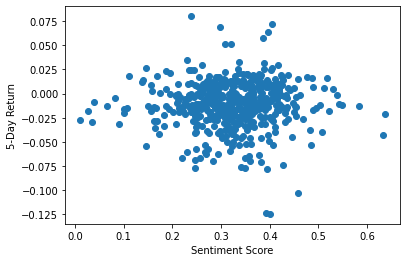

In [ ]:
# plot the sentiment score vs the 5-day return
import matplotlib.pyplot as plt
plt.scatter(data['sentiment_score'], data['five_day_return'])
plt.xlabel('Sentiment Score')
plt.ylabel('5-Day Return')
plt.show()

**Model**

In [17]:
import numpy as np

# train test split the data
from sklearn.model_selection import train_test_split
X = all_data[['polarity_score', 'sentiment_score']]
y = all_data['five_day_return']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from keras.models import Sequential
from keras.layers import Dense

X_val = X_test[0:100]
y_val = y_test[0:100]


# Build model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Make predictions
y_pred = model.predict(X_test)

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [24]:
# Evaluate model
loss = model.evaluate(X_test, y_test)
print("Test loss: ", loss)

4/4 [==============================] - 0s 5ms/step - loss: 0.0012
Test loss:  0.0011900990502908826


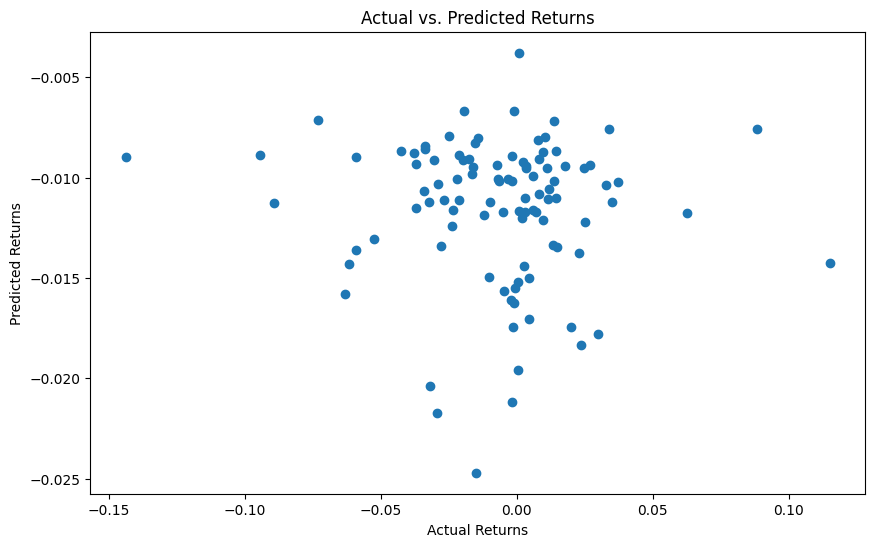

In [25]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted returns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.title("Actual vs. Predicted Returns")
plt.show()

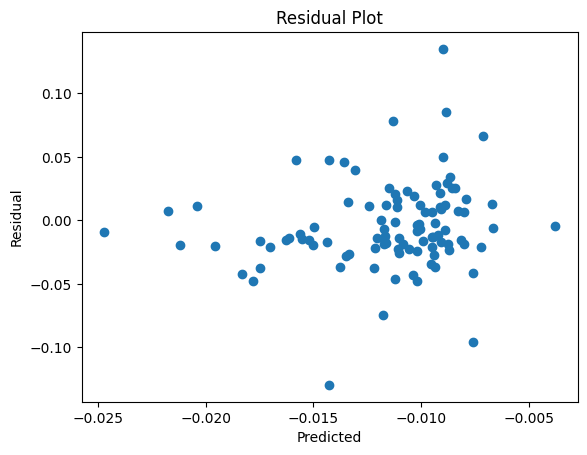

In [26]:
y_pred = y_pred.reshape(100,)
# residual plot
plt.scatter(y_pred, y_pred - y_test)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

In [ ]:
# interactive scatter plot for residsual plot
import plotly.express as px
fig = px.scatter(data, x='sentiment_score', y='five_day_return', trendline='ols')
fig.show()

**Can we Trade on this Model**

In [ ]:
# Thought Process: Get a dataframe of all tickers, what the model predicted, investment amount, what actually happened, and the gross return

In [35]:
# Create a DataFrame with y_test and y_pred values

results_df = pd.DataFrame({'ticker': X_test.index,
                           'y_pred': y_pred.flatten(),
                           'y_test': y_test.values})

results_df.set_index('ticker',inplace=True)

In [ ]:
# create new column to show investment amount based on y_pred
results_df['investment_amt'] = np.where(results_df['y_pred'] > 0, 100, -100)

# Moving it between y_test and y_pred for visual reasons
investment_amt_col = results_df.pop('investment_amt')
results_df.insert(1, 'investment_amt', investment_amt_col)

In [37]:
# Creating the gross return column
results_df['gross_return'] = results_df['investment_amt'] * results_df['y_test']
results_df.head()

,y_pred,investment_amt,y_test,gross_return
ticker,,,,
PCG,-0.008028,-100,-0.014402,1.440203
BWA,-0.012117,-100,0.009744,-0.974368
PM,-0.008284,-100,-0.015360,1.536044
EIX,-0.013363,-100,0.013125,-1.312490
CMS,-0.009077,-100,0.008007,-0.800666


In [43]:
# Checking the total gross return
sum_return = round(results_df['gross_return'].sum(), 2)
formatted_sum = f'${sum_return:.2f}'
print('Total gross return:', formatted_sum)

Total gross return: $69.36


In [ ]:
# Need to do another column for trading cost. Then I can get net return

## Other models

In [18]:
# Imports
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import sklearn.svm as svm
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV


In [20]:
# Cross validation on the classifiers and regressors to get the best model

# hyperparameter tuning for the classifiers and regressors
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 3, 4, 5],
}

param_grid_ada = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.001, 0.01, 1],
}

param_grid_svm = {
    "C": [0.1, 1],
    "gamma": [1, 0.01, 0.001],
    # "kernel": ["rbf", "poly", "sigmoid"],
}

param_grid_xgb = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.001, 0.01, 1],
    "max_depth": [5, 10, 15],
}

param_grid_log = {
    "C": [0.1, 1, 10],
    "penalty": ["l1", "l2"],
}

# cross validation
cv_values = [2, 3, 4, 5, 10, 15, 20, 25, 30]

# Initializing the models
# Classifiers
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
svm_clf = svm.SVC()
xgb_clf = XGBClassifier()
log_clf = LogisticRegression()
# Regressors
rf_reg = RandomForestRegressor()
ada_reg = AdaBoostRegressor()
svm_reg = svm.SVR()
xgb_reg = XGBRegressor()
log_reg = LinearRegression()

# Hyperparameter tuning
best_scores = {}

# initialize the scores
scores_rf_clf = []
scores_ada_clf = []
scores_svm_clf = []
scores_xgb_clf = []
scores_log_clf = []
scores_rf_reg = []
scores_ada_reg = []
scores_svm_reg = []
scores_xgb_reg = []
scores_log_reg = []

# loop through the cross validation values
for cv in cv_values:

    # Random Forest Regressor
    rf_reg_cv = GridSearchCV(rf_reg, param_grid_rf, cv=cv)
    rf_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for Random Forest Regressor: {rf_reg_cv.best_params_}')
    best_score_rf_reg = rf_reg_cv.best_score_
    scores_rf_reg.append(best_score_rf_reg)
    print(f'Best score for Random Forest Regressor: {best_score_rf_reg}')

    # AdaBoost Regressor
    ada_reg_cv = GridSearchCV(ada_reg, param_grid_ada, cv=cv)
    ada_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for AdaBoost Regressor: {ada_reg_cv.best_params_}')
    best_score_ada_reg = ada_reg_cv.best_score_
    scores_ada_reg.append(best_score_ada_reg)
    print(f'Best score for AdaBoost Regressor: {best_score_ada_reg}')

    # SVM Regressor
    svm_reg_cv = GridSearchCV(svm_reg, param_grid_svm, cv=cv)
    svm_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for SVM Regressor: {svm_reg_cv.best_params_}')
    best_score_svm_reg = svm_reg_cv.best_score_
    scores_svm_reg.append(best_score_svm_reg)
    print(f'Best score for SVM Regressor: {best_score_svm_reg}')

    # Gradient Boost Regressor
    xgb_reg_cv = GridSearchCV(xgb_reg, param_grid_xgb, cv=cv)
    xgb_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for Gradient Boost Regressor: {xgb_reg_cv.best_params_}')
    best_score_xgb_reg = xgb_reg_cv.best_score_
    scores_xgb_reg.append(best_score_xgb_reg)
    print(f'Best score for Gradient Boost Regressor: {best_score_xgb_reg}')

    # # Linear Regression
    # log_reg_cv = GridSearchCV(log_reg, param_grid_log, cv=cv)
    # log_reg_cv.fit(X_train, y_train)
    # print(f'Best parameters for Linear Regression: {log_reg_cv.best_params_}')
    # best_score_log_reg = log_reg_cv.best_score_
    # scores_log_reg.append(best_score_log_reg)
    # print(f'Best score for Linear Regression: {best_score_log_reg}')
    

# create a dataframe to store the results
model_score_df = pd.DataFrame({
    'Random Forest Regressor': scores_rf_reg,
    'AdaBoost Regressor': scores_ada_reg,
    'SVM Regressor': scores_svm_reg,
    'Gradient Boost Regressor': scores_xgb_reg
    # 'Linear Regression': scores_log_reg
    })


Best parameters for Random Forest Regressor: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 50}
Best score for Random Forest Regressor: -0.08233448747438898
Best parameters for AdaBoost Regressor: {'learning_rate': 0.001, 'n_estimators': 100}
Best score for AdaBoost Regressor: -0.034002055020663446
Best parameters for SVM Regressor: {'C': 0.1, 'gamma': 1}
Best score for SVM Regressor: -0.3182833874923784
Best parameters for Gradient Boost Regressor: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Best score for Gradient Boost Regressor: -0.1888645024713529
Best parameters for Random Forest Regressor: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best score for Random Forest Regressor: -0.12441259138640914
Best parameters for AdaBoost Regressor: {'learning_rate': 0.001, 'n_estimators': 500}
Best score for AdaBoost Regressor: -0.04643849224165164
Best parameters for SVM Regressor: {'C': 0.1, 'gamma': 1}
Best score for SVM Regressor: -0.3881753821454

KeyboardInterrupt: 

In [21]:
# get the best model with the highest score and model name
best_score = model_score_df.max().max()

NameError: name 'model_score_df' is not defined